In [1]:
## Step 1: Reading the data

#In the [notebook](./Titanic.ipynb) provided, do the following:

#1. Import `pandas` and `matplotlib.pyplot`
#1. Load [train.csv](./train.csv) as a `pandas` DataFrame.
#1. In each of the following sections, copy the question as a python comment, then answer the question with your own code.
#1. Refer to the [Titanic Kaggle competition](https://www.kaggle.com/c/titanic/data) if you need an explanation for any of the columns.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#loading in our dataframe
train = pd.read_csv('./train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#renaming the columns to Python conventions
new_columns_dict = {
    'PassengerId': 'passenger_id',
    'Survived': 'survived',
    'Pclass': 'p_class',
    'Name': 'name',
    'Sex': 'sex',
    'Age': 'age',
    'SibSp': 'sib_sp',
    'Parch': 'parch',
    'Ticket': 'ticket',
    'Fare': 'fare',
    'Cabin': 'cabin',
    'Embarked': 'embarked',
}

In [5]:
#inplace = True updates/saves the dataframe train with the new column labels
train.rename(columns = new_columns_dict, inplace = True)

In [6]:
## Step 2: Cleaning the data

#1. Create a bar chart showing how many missing values are in each column
#  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
#      - [Install Instructions](https://pypi.org/project/missingno/)
#      - [Usage Documentation](https://github.com/ResidentMario/missingno)
#2. Which column has the most `NaN` values? How many cells in that column are empty?
#3. Delete all rows where `Embarked` is empty
#4. Fill all empty cabins with **¯\\_(ツ)_/¯**

#Note: `NaN`, empty, and missing are synonymous.

In [7]:
#getting a count of the null values in each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   p_class       891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sib_sp        891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.count();

In [9]:
train.isnull().sum();

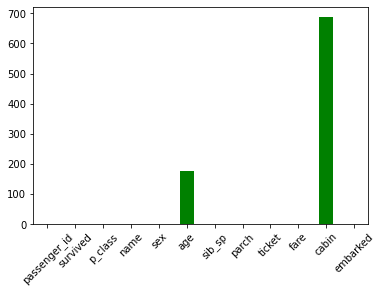

In [10]:
#answer to 1.
train.isnull().sum().plot.bar(x = 'index', y = 'n',  rot = 45, color = 'Green');

#answer to 2. Column 'cabin' has the most null/NaN values

In [11]:
#answer to 3. Delete all rows where `Embarked` is empty
train.dropna(subset = ['embarked'], inplace = True)

#checking answer with .info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  889 non-null    int64  
 1   survived      889 non-null    int64  
 2   p_class       889 non-null    int64  
 3   name          889 non-null    object 
 4   sex           889 non-null    object 
 5   age           712 non-null    float64
 6   sib_sp        889 non-null    int64  
 7   parch         889 non-null    int64  
 8   ticket        889 non-null    object 
 9   fare          889 non-null    float64
 10  cabin         202 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [12]:
#answer to 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

#attempt at a transformation with lamba, couldn't get it to work:
#train.cabin = train.cabin.map(lambda cabin: '**¯\\_(ツ)_/¯**' if cabin == (np.NaN) else cabin)

#resolved question 4. with .fillna in the column cabin
train['cabin'].fillna('**¯\\_(ツ)_/¯**', inplace = True)
train['cabin'].head()

0    **¯\_(ツ)_/¯**
1              C85
2    **¯\_(ツ)_/¯**
3             C123
4    **¯\_(ツ)_/¯**
Name: cabin, dtype: object

In [13]:
### Step 3: Feature extraction
#1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
#2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
#3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
#  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
#  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
#  - Do the same thing for `Sex`
#  - BONUS: Extract the title from everyone's name and create dummy columns

In [14]:
#answer to 1.
#followed the tutorial on https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
#for creating new columns from existing one
train['family_count'] = train['sib_sp'] + train['parch']
train[['family_count']]

,family_count
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,3
889,0


In [15]:
#got information on .where on https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
#I attempted this method but couldn't get it to work
#train['is_reverend'] = np.where('Reverend' is in train['name'], 1, 0)

In [16]:
#got information on .str.contains on https://towardsdatascience.com/check-for-a-substring-in-a-pandas-dataframe-column-4b949f64852
#making a new column 'is_reverend' where column 'name' contains Rev (Rev is not a name so this shouldn't be an issue)
train['is_reverend'] = train['name'].str.contains('Rev')

#printed out train['is_reverend'] to check
#True/False values updated
#train['is_reverend']

In [17]:
#at this point I realized I could use the .where
#method with .str.contains to return the
#answer to 2.
train['is_reverend'] = np.where(train['name'].str.contains('Rev'), 1, 0)
train[['is_reverend']].head()

,is_reverend
0,0
1,0
2,0
3,0
4,0


In [18]:
#cutting Step 3 question 3. down here for ease of reference
#3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
#  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
#  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
#  - Do the same thing for `Sex`
#  - BONUS: Extract the title from everyone's name and create dummy columns

In [19]:
train['Embarked_C'] = np.where(train['embarked'].str.contains('C'), 1, 0)
train['Embarked_Q'] = np.where(train['embarked'].str.contains('Q'), 1, 0)
train['Embarked_S'] = np.where(train['embarked'].str.contains('S'), 1, 0)
#train[['Embarked_C', 'Embarked_Q', 'Embarked_S']]
#the above comment joins the Embarked columns together
#this was done for my own benefit

In [20]:
#now with pd.get_dummies, the link provided didn't really help my understanding
#so I went to https://www.w3resource.com/pandas/get_dummies.php
#to learn about pd.get_dummies

#answer to number 3. subsection 2.
embarked_split = pd.get_dummies(train['embarked'], prefix='Embarked_')
embarked_split.head()

,Embarked__C,Embarked__Q,Embarked__S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
#answer to number 3. subsection 3.
sex_split = pd.get_dummies(train['sex'])
sex_split.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [22]:
#answer to number 3. bonus
#BONUS: Extract the title from everyone's name and create dummy columns

#ATTEMPT name_split = pd.get_dummies(train['name'])

#ATTEMPT train['title'] = pd.get_dummies(train['name'] 

#ATTEMPT np.where(train['name'].str.contains('Mr. | Mrs. | Ms. | Miss. | Master'), 1, 0) ???

#https://thispointer.com/python-map-function-explained-with-examples/
#best ATTEMPT BELOW, thinks this resolves it: 
#first we need the lambda function to split at the comma, git rid of last names and return the title after the '.'
train['title'] = train['name'].map(lambda x: x.split(', ')[1].split('.')[0])
nametitle_split = pd.get_dummies(train['title'])

#fun fact: Jonkheer is the lowest rank of nobility in the Netherlands, Lord/Lady would be the english equivalent

In [23]:
train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [24]:
train['title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Jonkheer          1
Ms                1
Capt              1
Lady              1
Don               1
Sir               1
the Countess      1
Mme               1
Name: title, dtype: int64

In [25]:
train.head()

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,family_count,is_reverend,Embarked_C,Embarked_Q,Embarked_S,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0,0,0,1,Mr


In [26]:
## Step 4: Exploratory analysis 
#_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#1. What was the survival rate overall?
#2. Which gender fared the worst? What was their survival rate?
#3. What was the survival rate for each `Pclass`?
#4. Did any reverends survive? How many?
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
#6. What is the survival rate for people whose `Age` is empty?
#7. What is the survival rate for each port of embarkation?
#8. What is the survival rate for children (under 12) in each `Pclass`?
#9. Did the captain of the ship survive? Is he on the list?
#10. Of all the people that died, who had the most expensive ticket? How much did it cost?
#11. Does having family on the boat help or hurt your chances of survival?

In [27]:
#for ease of reference
train.head()

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,family_count,is_reverend,Embarked_C,Embarked_Q,Embarked_S,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0,0,0,1,Mr


In [28]:
train['survived'].value_counts()

0    549
1    340
Name: survived, dtype: int64

In [29]:
#this isn't the neatest in the world but:
survived_pct = 340 / 889

In [30]:
#1. What was the survival rate overall?
print(f'The overall survival rate was {survived_pct}')

The overall survival rate was 0.38245219347581555


In [31]:
#2. Which gender fared the worst? What was their survival rate?

#I want to count both the total number of passengers and the number of survivors for each sex
#and then divide the number of survivors by the total number of passengers for each sex

#returns the value counts of male and female, 577 and 213
total_male = list(train[['sex']].value_counts())[0]
total_female = list(train[['sex']].value_counts())[1]

#returns the rows by columns of that are sex 'male' and survived '1' (rows represent the males survived)
#there were 109 male survivors and 231 female survivors
males_survived = list(np.array(train[(train['sex'] == 'male') & (train['survived'] == 1)].shape))[0]
females_survived = list(np.array(train[(train['sex'] == 'female') & (train['survived'] == 1)].shape))[0]

#calculating the percentage of suvivors by sex
per_males_surv = males_survived / total_male
per_females_surv = females_survived / total_female

In [32]:
print('The male survival rate was: {}'.format(per_males_surv))

The male survival rate was: 0.18890814558058924


In [33]:
print('The female survival rate was: {}'.format(per_females_surv))

The female survival rate was: 0.7403846153846154


In [34]:
#answer to number 2. 
#Males faired far worse than females in terms of survival,
#approximately 1 male survived for every 4 females

In [35]:
#3. What was the survival rate for each `Pclass`?
#Just like 2. I want to count both the total number of pass. per class and the number of survivors per class
#and do the appropriate division

#train[['p_class']].value_counts() looks like:
#p_class
#3          491
#1          214
#2          184

#counting the total number of passengers per class
p_1 = train[['p_class']].value_counts()[1]
p_2 = train[['p_class']].value_counts()[2]
p_3 = train[['p_class']].value_counts()[3]

#counting the survivors for each class
p_1_surv = list(np.array(train[(train['p_class'] == 1) & (train['survived'] == 1)].shape))[0]
p_2_surv = list(np.array(train[(train['p_class'] == 2) & (train['survived'] == 1)].shape))[0]
p_3_surv = list(np.array(train[(train['p_class'] == 3) & (train['survived'] == 1)].shape))[0]

#calculating the percent (multiplying by 100) of survivors per class
per_p_1 = p_1_surv / p_1 * 100
per_p_2 = p_2_surv / p_2 * 100
per_p_3 = p_3_surv / p_3 * 100

#answer to number 3. 
print(f'First class had a survival rate of {per_p_1}.',
     f'Second class had a survival rate of {per_p_2}.',
     f'Third class had a survival rate of {per_p_3}.')

First class had a survival rate of 62.616822429906534. Second class had a survival rate of 47.28260869565217. Third class had a survival rate of 24.236252545824847.


In [36]:
#4. Did any reverends survive? How many?

#counting the total number of reverends
reverends = train[['is_reverend']].value_counts()[1]

#note to self, I googled about the Titanic losses and saw there were also three catholic priests, 
#titled 'Father' onboard I should maybe include a section about them later, 
#in the voluntary information section

#counting the number of reverends survived
reverends_surv = list(np.array(train[(train['is_reverend'] == 1) & (train['survived'] == 1)].shape))[0]

#answer to number 4.
print(f'{reverends_surv} reverends survived the sinking of the Titanic.')

0 reverends survived the sinking of the Titanic.


In [37]:
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

#counting the total number of passengers not in cabins
no_cabin = train[(train['cabin'] == '**¯\_(ツ)_/¯**')].shape[0]

#counting the number of passengers not in cabins who survived
no_cabin_surv = (train[(train['cabin'] == '**¯\_(ツ)_/¯**') & (train['survived'] == 1)].shape)[0]

#calculating the percent (multiplying by 100) of survivors without cabins
per_no_cabin = no_cabin_surv / no_cabin * 100

#answer to number 5.
print(f'{per_no_cabin}% of people without cabins survived the sinking of the Titanic.')

29.985443959243085% of people without cabins survived the sinking of the Titanic.


In [38]:
#6. What is the survival rate for people whose `Age` is empty?

#counting the total number of passengers whose age is not recorded
no_age = train[(train['age'].isnull())].shape[0]

#counting the number of passengers whose age was not recorded and survived
no_age_surv = (train[(train['age'].isnull()) & (train['survived'] == 1)].shape)[0]

#calculating the percent (multiplying by 100) of survivors without cabins
per_no_age = no_age_surv / no_age * 100

#answer to number 6.
print(f'{per_no_age}% of people whose ages were not recorded survived the sinking of the Titanic.')

29.37853107344633% of people whose ages were not recorded survived the sinking of the Titanic.


In [39]:
#7. What is the survival rate for each port of embarkation?

#counting the total number of passengers who embarked at each port
embarked_C = train[['Embarked_C']].value_counts()[1]
embarked_Q = train[['Embarked_Q']].value_counts()[1]
embarked_S = train[['Embarked_S']].value_counts()[1]

#counting the number of passengers who survived for each port of embarkation
emb_C_surv = (train[(train['Embarked_C'] == 1) & (train['survived'] == 1)].shape)[0]
emb_Q_surv = (train[(train['Embarked_Q'] == 1) & (train['survived'] == 1)].shape)[0]
emb_S_surv = (train[(train['Embarked_S'] == 1) & (train['survived'] == 1)].shape)[0]

#calculating the percent (multiplying by 100) of survivors per port of embarkation
per_emb_C = emb_C_surv / embarked_C * 100
per_emb_Q= emb_Q_surv / embarked_Q * 100
per_emb_S = emb_S_surv / embarked_S * 100

#answer to number 7.
print(f'Passengers embarking from Port C had a survival rate of {per_emb_C}.',
     f'Passengers embarking from Port Q had a survival rate of {per_emb_Q}.',
     f'Passengers embarking from Port S had a survival rate of {per_emb_S}.')

Passengers embarking from Port C had a survival rate of 55.35714285714286. Passengers embarking from Port Q had a survival rate of 38.961038961038966. Passengers embarking from Port S had a survival rate of 33.69565217391305.


In [40]:
#8. What is the survival rate for children (under 12) in each `Pclass`?

#train[(train['age'] < 12)].shape[0] returns the total number of passengers under 12, 68.

#counting the total number of passengers under 12 per class
p_1_under12 = train[(train['p_class'] == 1) & (train['age'] < 12)].shape[0]
p_2_under12 = train[(train['p_class'] == 2) & (train['age'] < 12)].shape[0]
p_3_under12 = train[(train['p_class'] == 3) & (train['age'] < 12)].shape[0]

#counting the survivors for each class
p_1_under12_surv = train[(train['p_class'] == 1) & (train['age'] < 12) & (train['survived'] == 1)].shape[0]
p_2_under12_surv = train[(train['p_class'] == 2) & (train['age'] < 12) & (train['survived'] == 1)].shape[0]
p_3_under12_surv = train[(train['p_class'] == 3) & (train['age'] < 12) & (train['survived'] == 1)].shape[0]

#calculating the percent (multiplying by 100) of survivors per class
per_p_1_under12_surv = p_1_under12_surv / p_1_under12 * 100
per_p_2_under12_surv = p_2_under12_surv / p_2_under12 * 100
per_p_3_under12_surv = p_3_under12_surv / p_3_under12 * 100

#answer to number 8. 
print(f'First class children had a survival rate of {per_p_1_under12_surv}.',
     f'Second class children had a survival rate of {per_p_2_under12_surv}.',
     f'Third class children had a survival rate of {per_p_3_under12_surv}.')

First class children had a survival rate of 75.0. Second class children had a survival rate of 100.0. Third class children had a survival rate of 40.42553191489361.


In [41]:
#9. Did the captain of the ship survive? Is he on the list

#returning the entry for the Capt
captain_entry = train[(train['name'].str.contains('Capt'))]

#checking that the Capt did not survive
#you can do this visually by looking at train[(train['name'].str.contains('Capt'))],
#I just wanted to write the statement again:
captains_survived = train[(train['name'].str.contains('Capt')) & (train['survived'] == 1)].shape[0]

#answer to 9.
#The captain was passenger ID 746. He did not survive the sinking of the titanic. 

In [42]:
#10. Of all the people that died, who had the most expensive ticket? How much did it cost?

train.loc[train['survived'] == 0].sort_values('fare', ascending=False).head()

#answer to 10.
print('Misters Mark Fortune and Charles Alexander Fortune did not survive. If the fare was paid per room, and Mr. Fortune booked three cabin rooms for a total of 263.00 he paid 87.67 per cabin')

Misters Mark Fortune and Charles Alexander Fortune did not survive. If the fare was paid per room, and Mr. Fortune booked three cabin rooms for a total of 263.00 he paid 87.67 per cabin


In [43]:
#11. Does having family on the boat help or hurt your chances of survival?

#reorganizing the df to sort by highest familiy_count, which is 10
families = train.sort_values(by='family_count', ascending=False)
families.head()

#I had trouble with this next part, I used the code from Intro to Pandas,
#diamonds.groupby('cut')['price'].mean() to get me started:
familiy_surv = families.groupby('family_count')['survived'].mean() *100
familiy_surv

family_count
0     30.093458
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: survived, dtype: float64

In [44]:
#answer to 11.
#Looking at the above data, families with 3 individuals (ie. mother, father, child or mother, father sibling)
#had the greatest chance of survival. Those families with the highest number of members (7-10) fared the worst.
#From this data, if I were a Titanic passenger I'd rather be by myself than with my whole extended family. 

In [45]:
## Step 5: Plotting
#Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. 
#It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

In [46]:
train.head()

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,family_count,is_reverend,Embarked_C,Embarked_Q,Embarked_S,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0,0,0,1,Mr


C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 648x648 with 0 Axes>

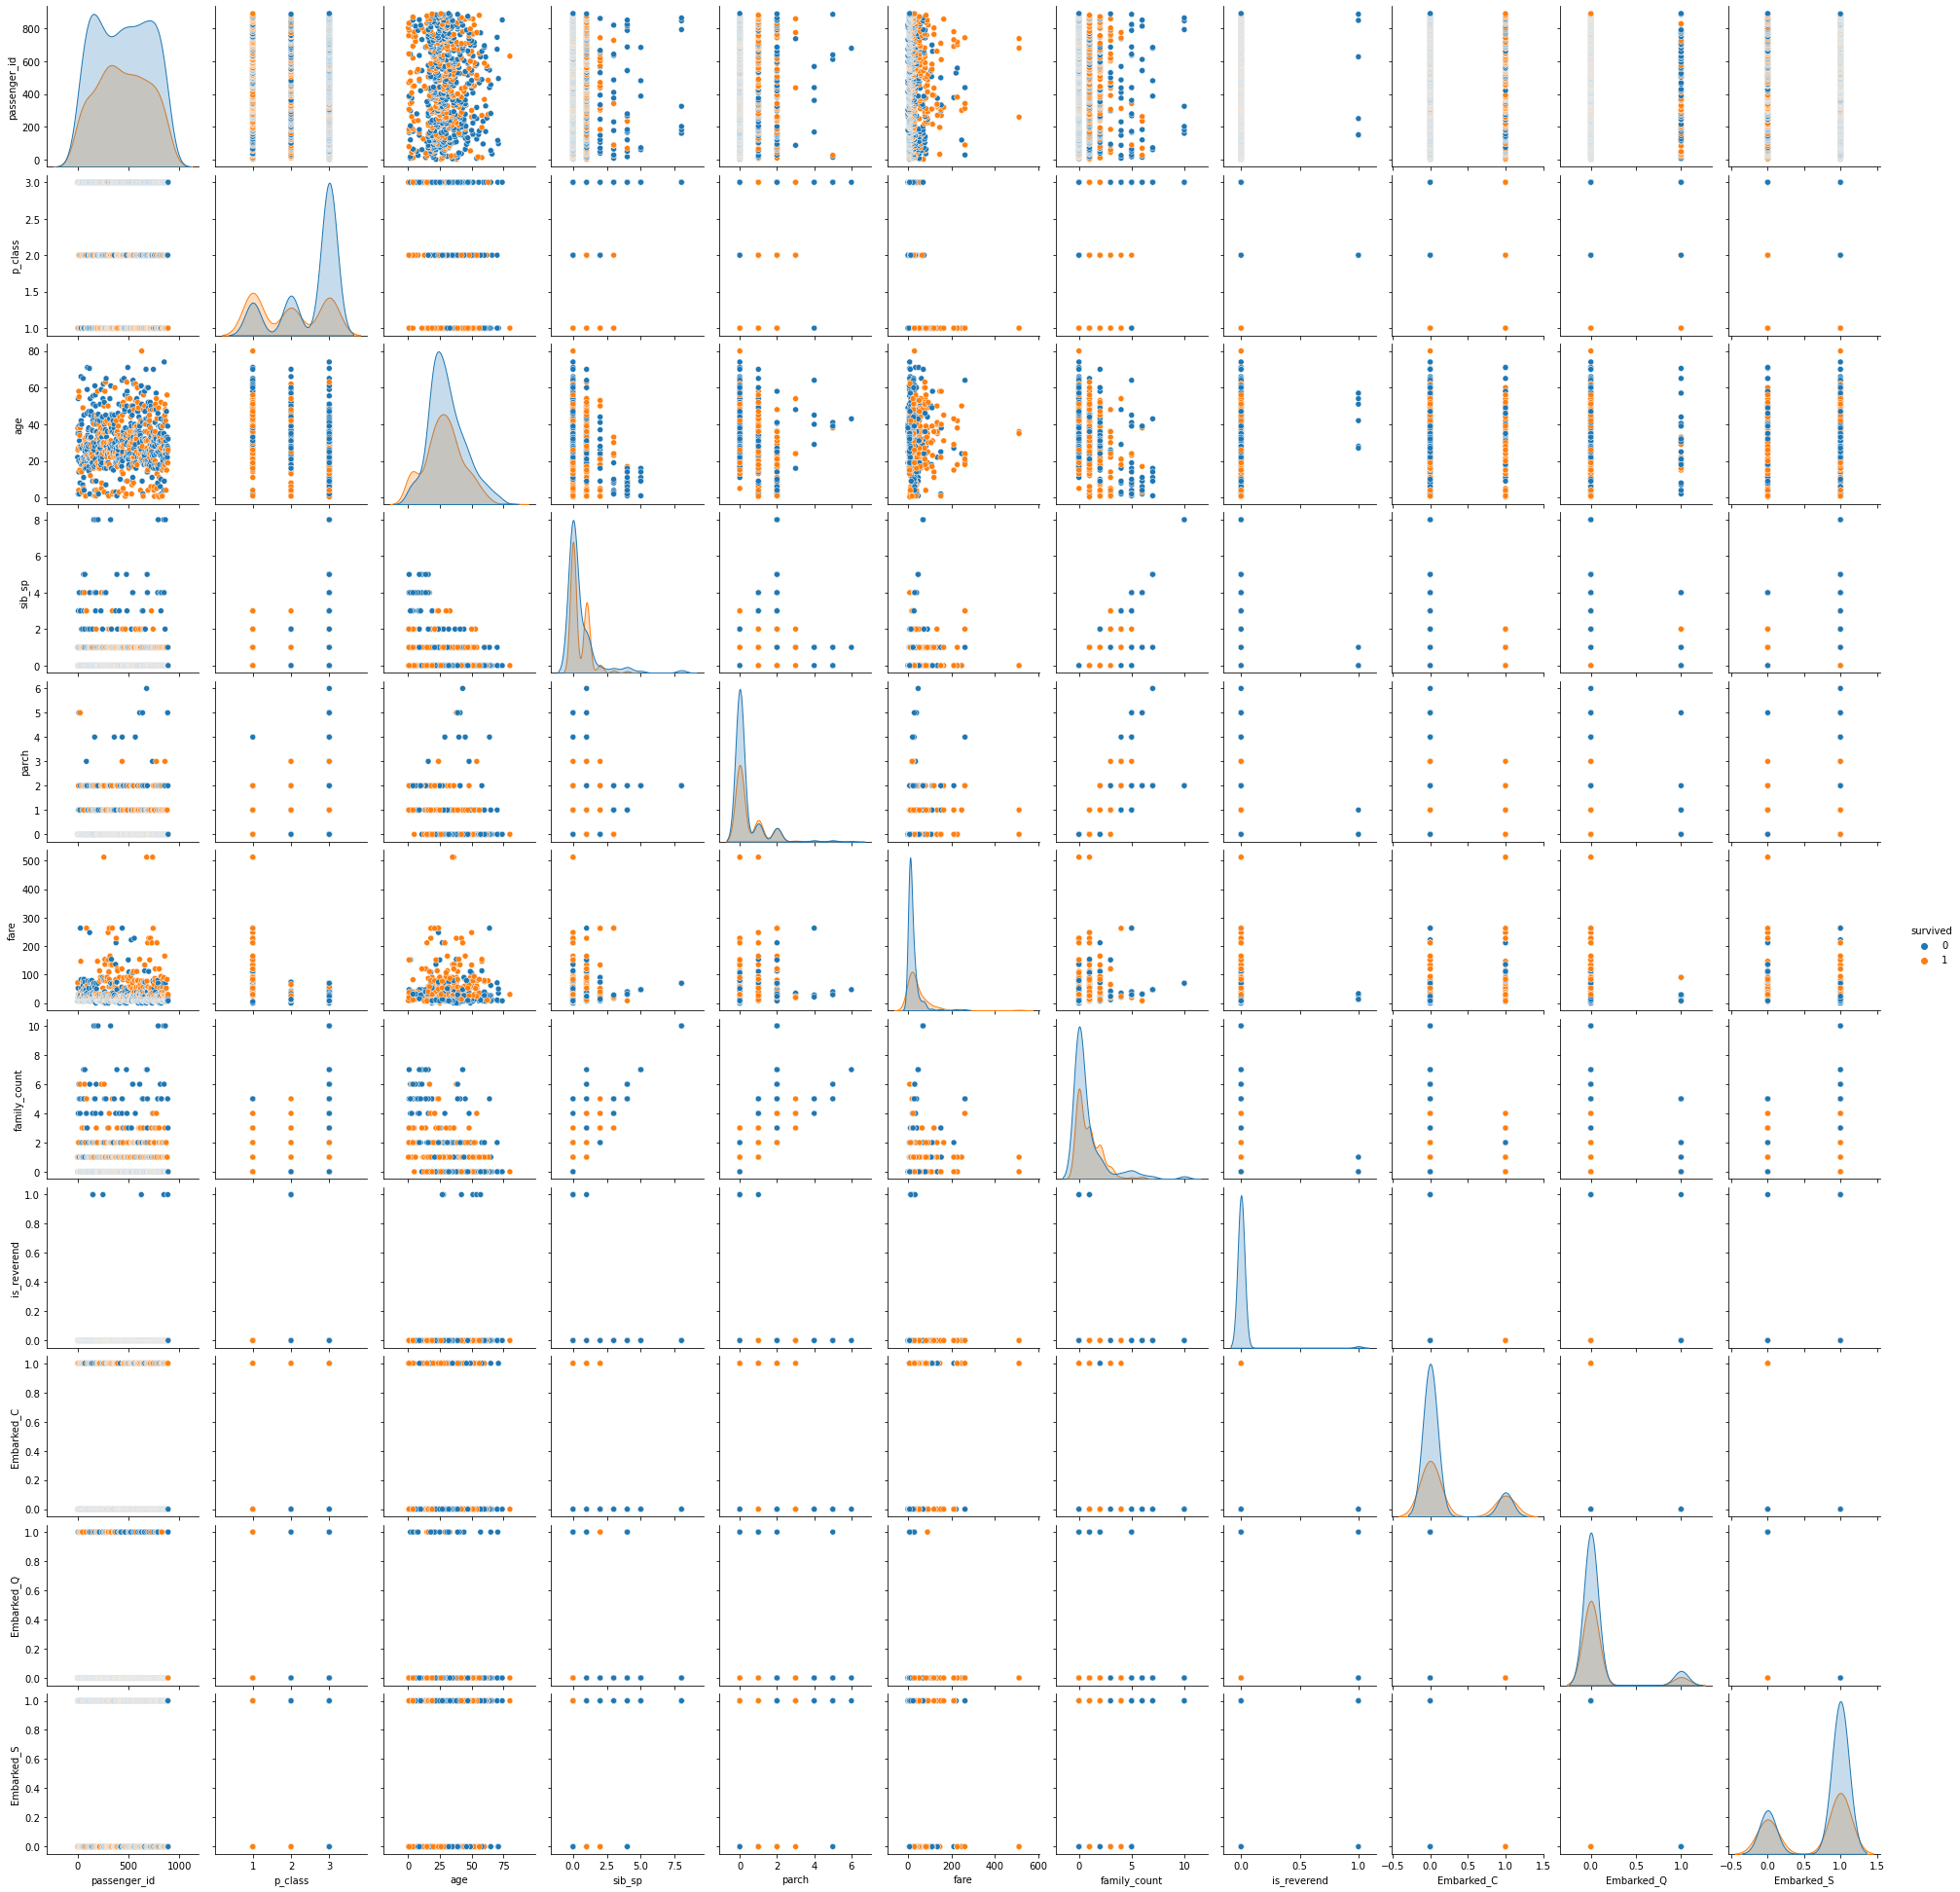

In [47]:
#generating a pairplot to get a general idea of relationships between columns
plt.figure(figsize=(9,9))
sns.pairplot(train, hue = 'survived');

C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 648x648 with 0 Axes>

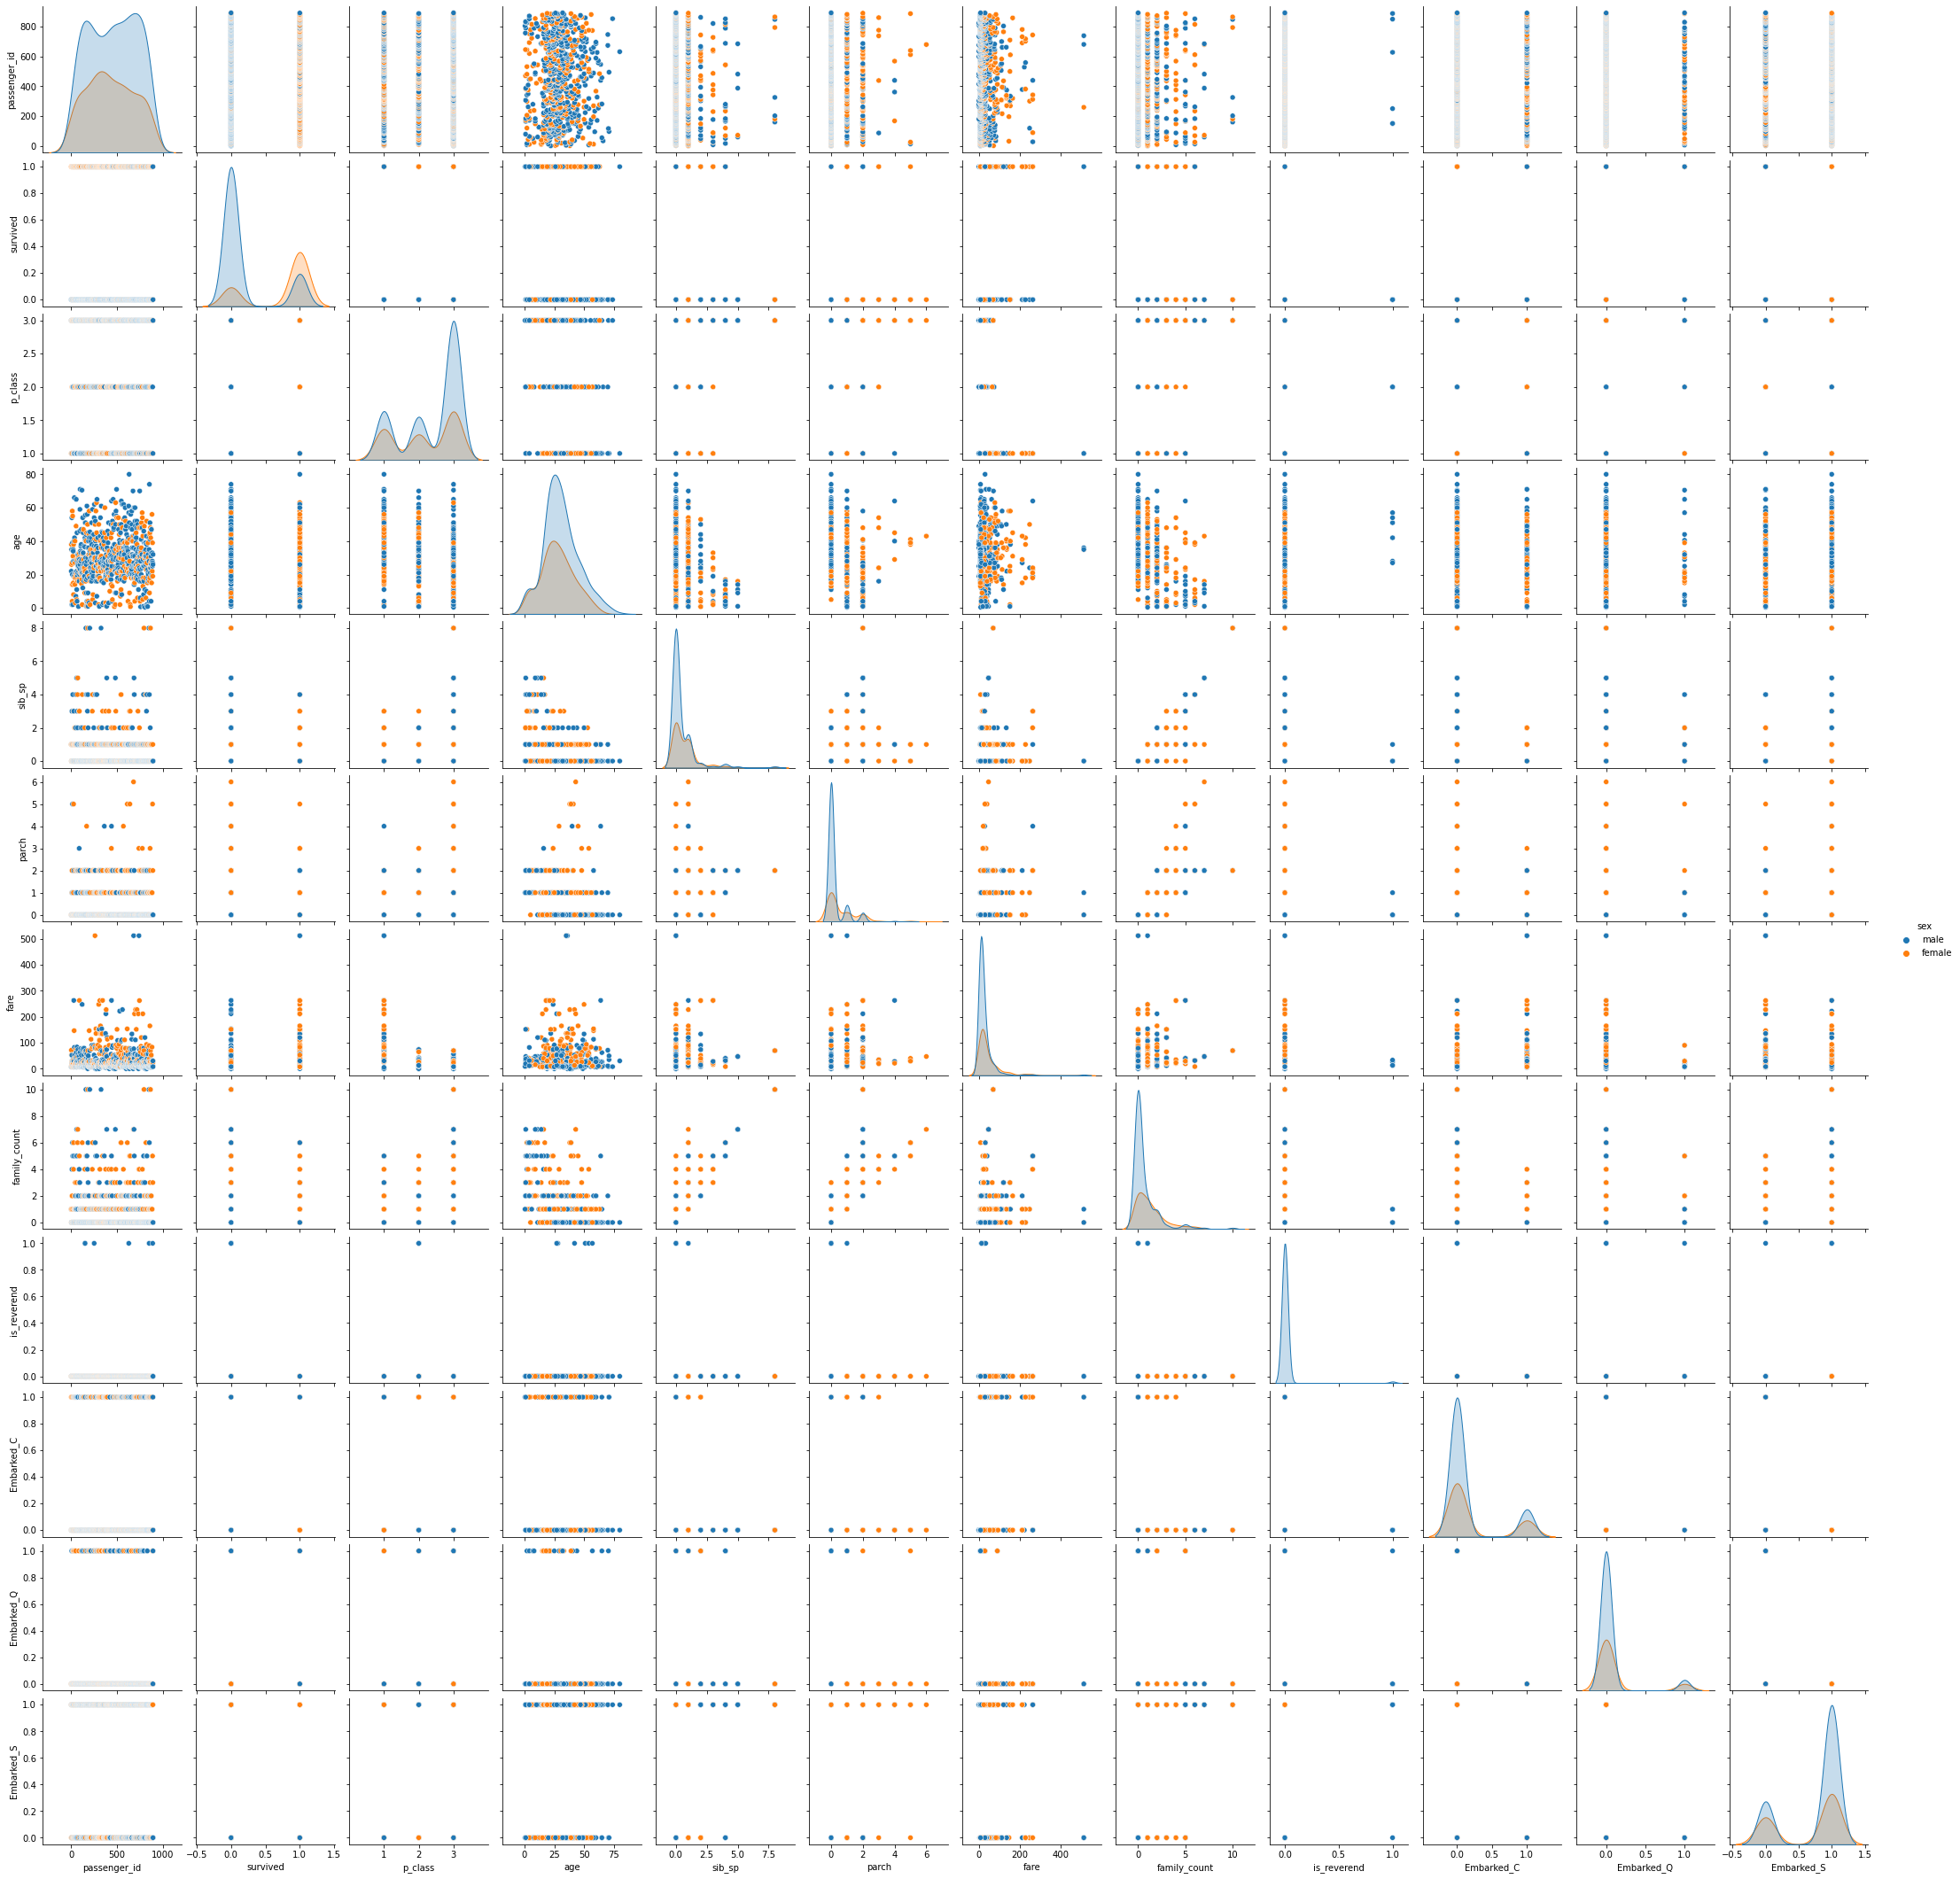

In [48]:
#generating a pairplot to get a general idea of relationships between columns
plt.figure(figsize=(9,9))
sns.pairplot(train, hue = 'sex');

C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

<Figure size 648x648 with 0 Axes>

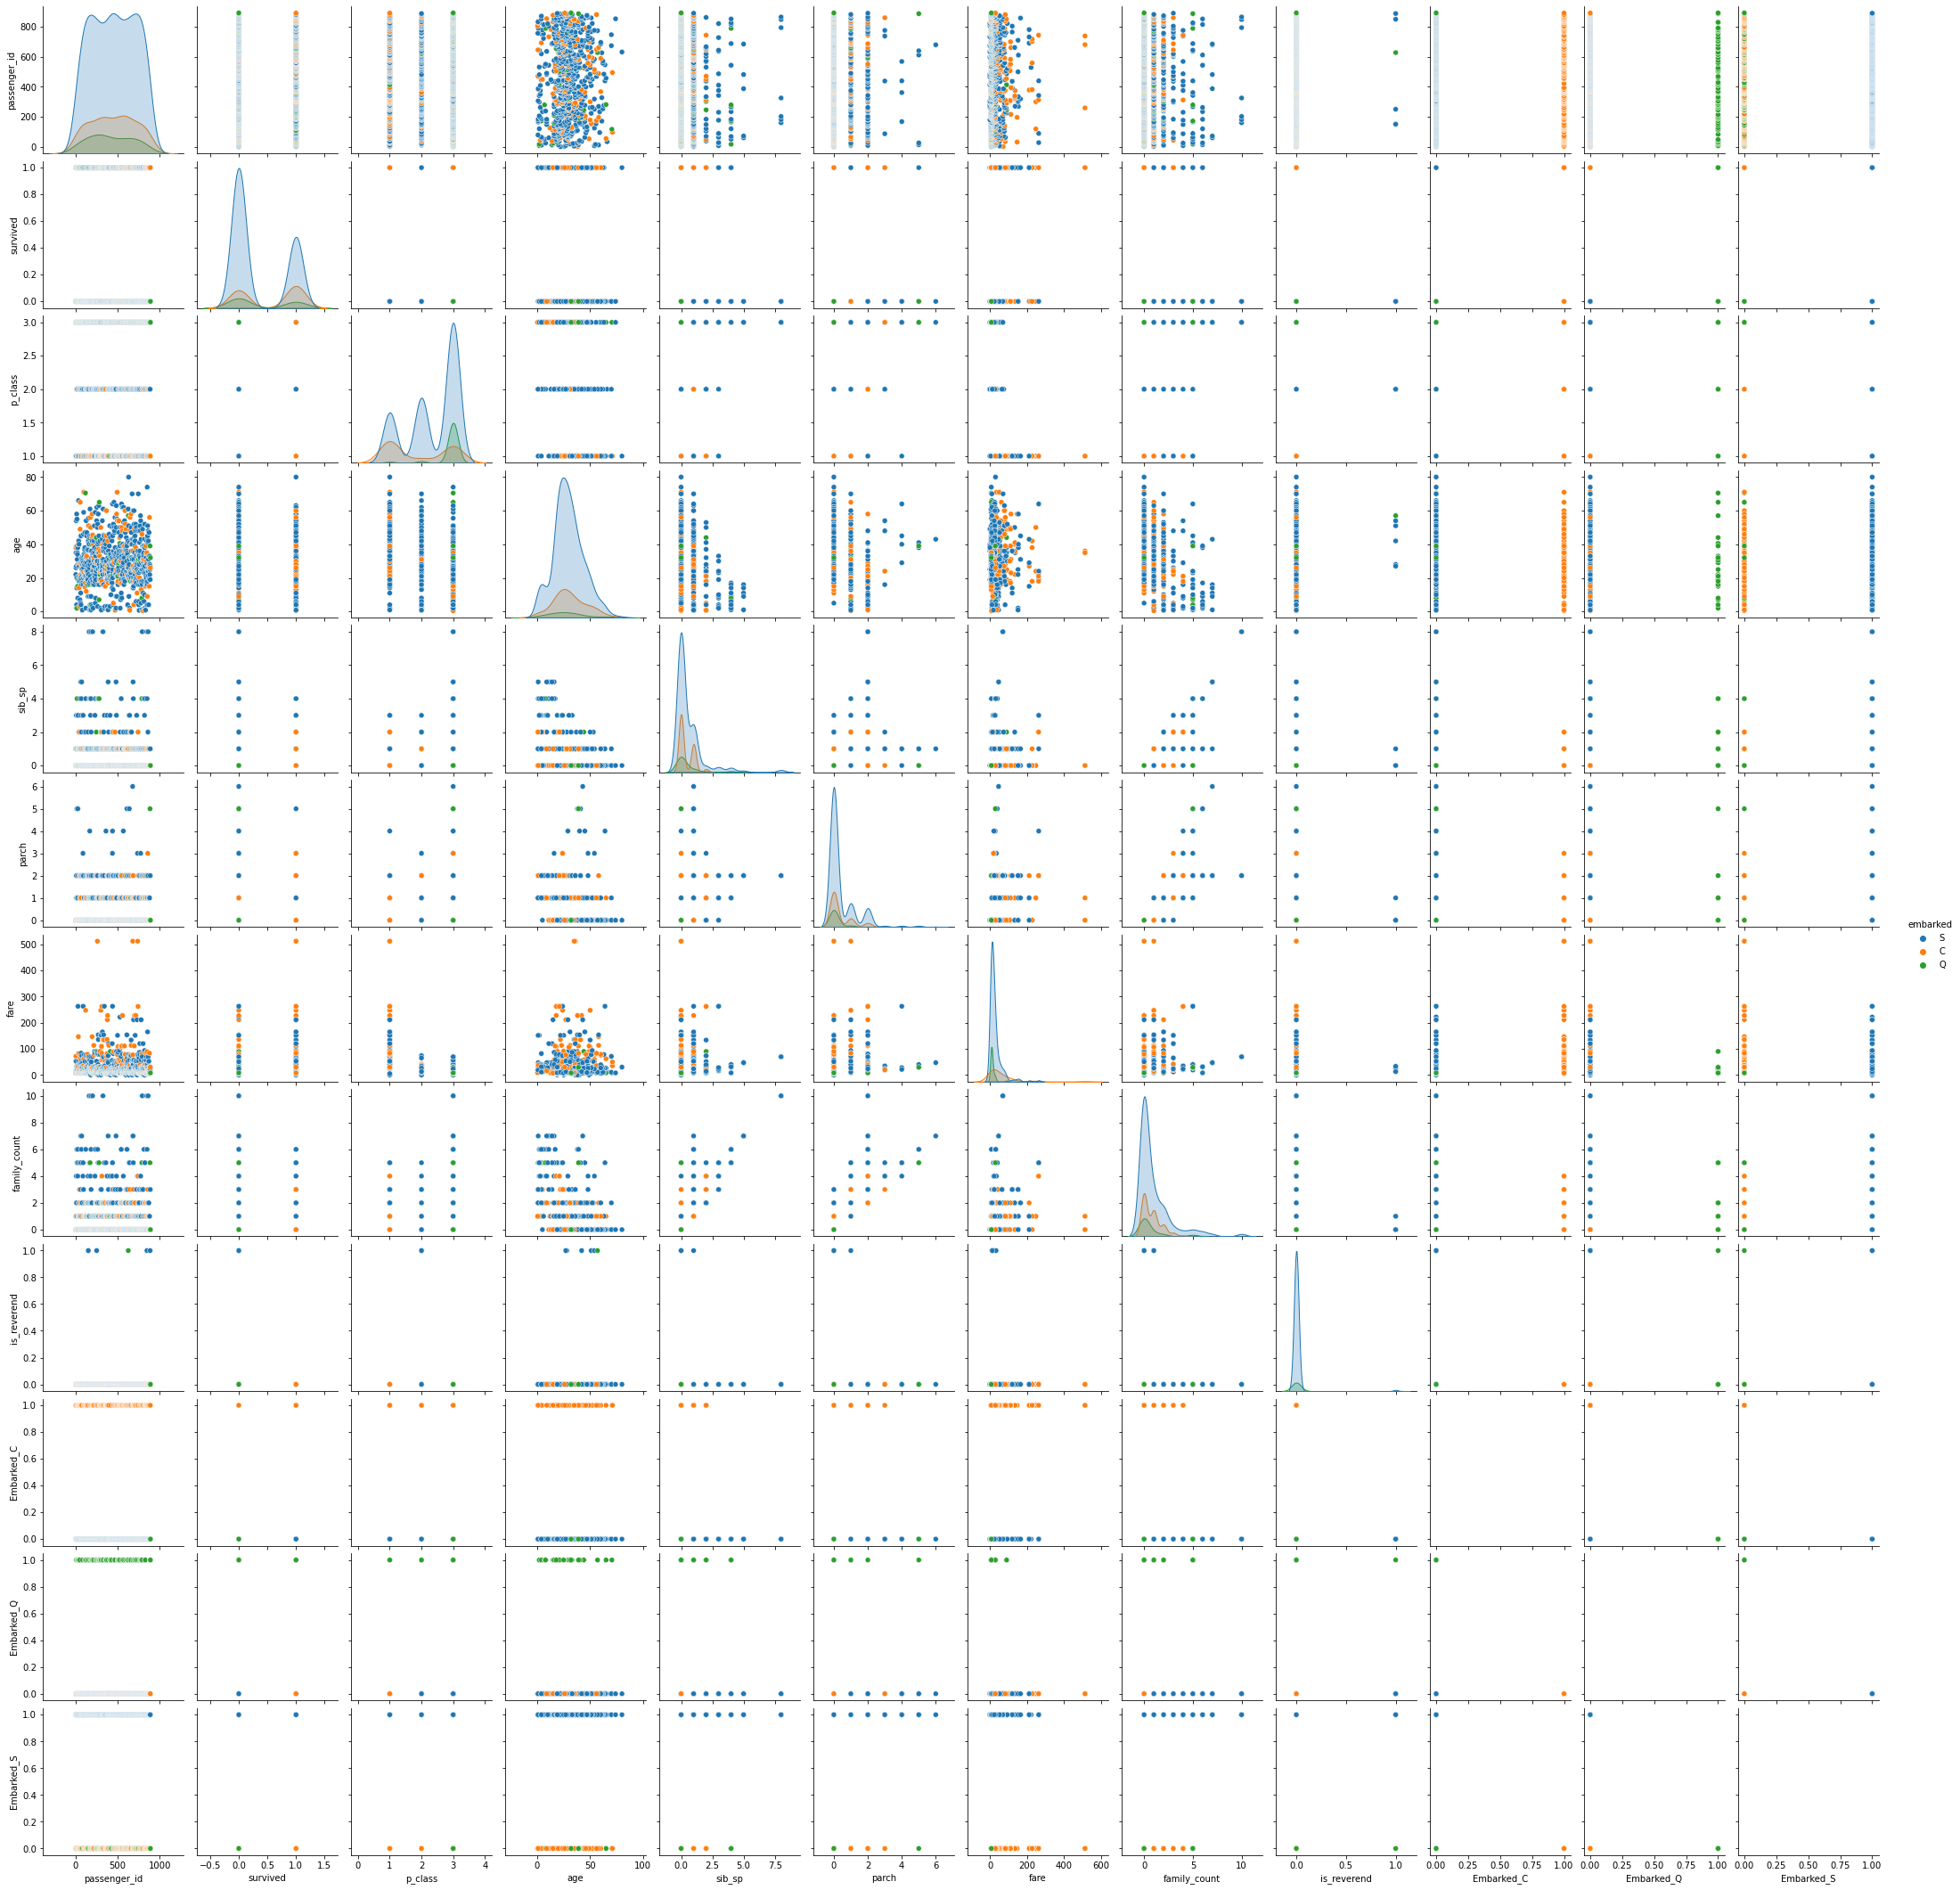

In [49]:
#generating a pairplot to get a general idea of relationships between columns
plt.figure(figsize=(9,9))
sns.pairplot(train, hue = 'embarked');

C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mary\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 648x648 with 0 Axes>

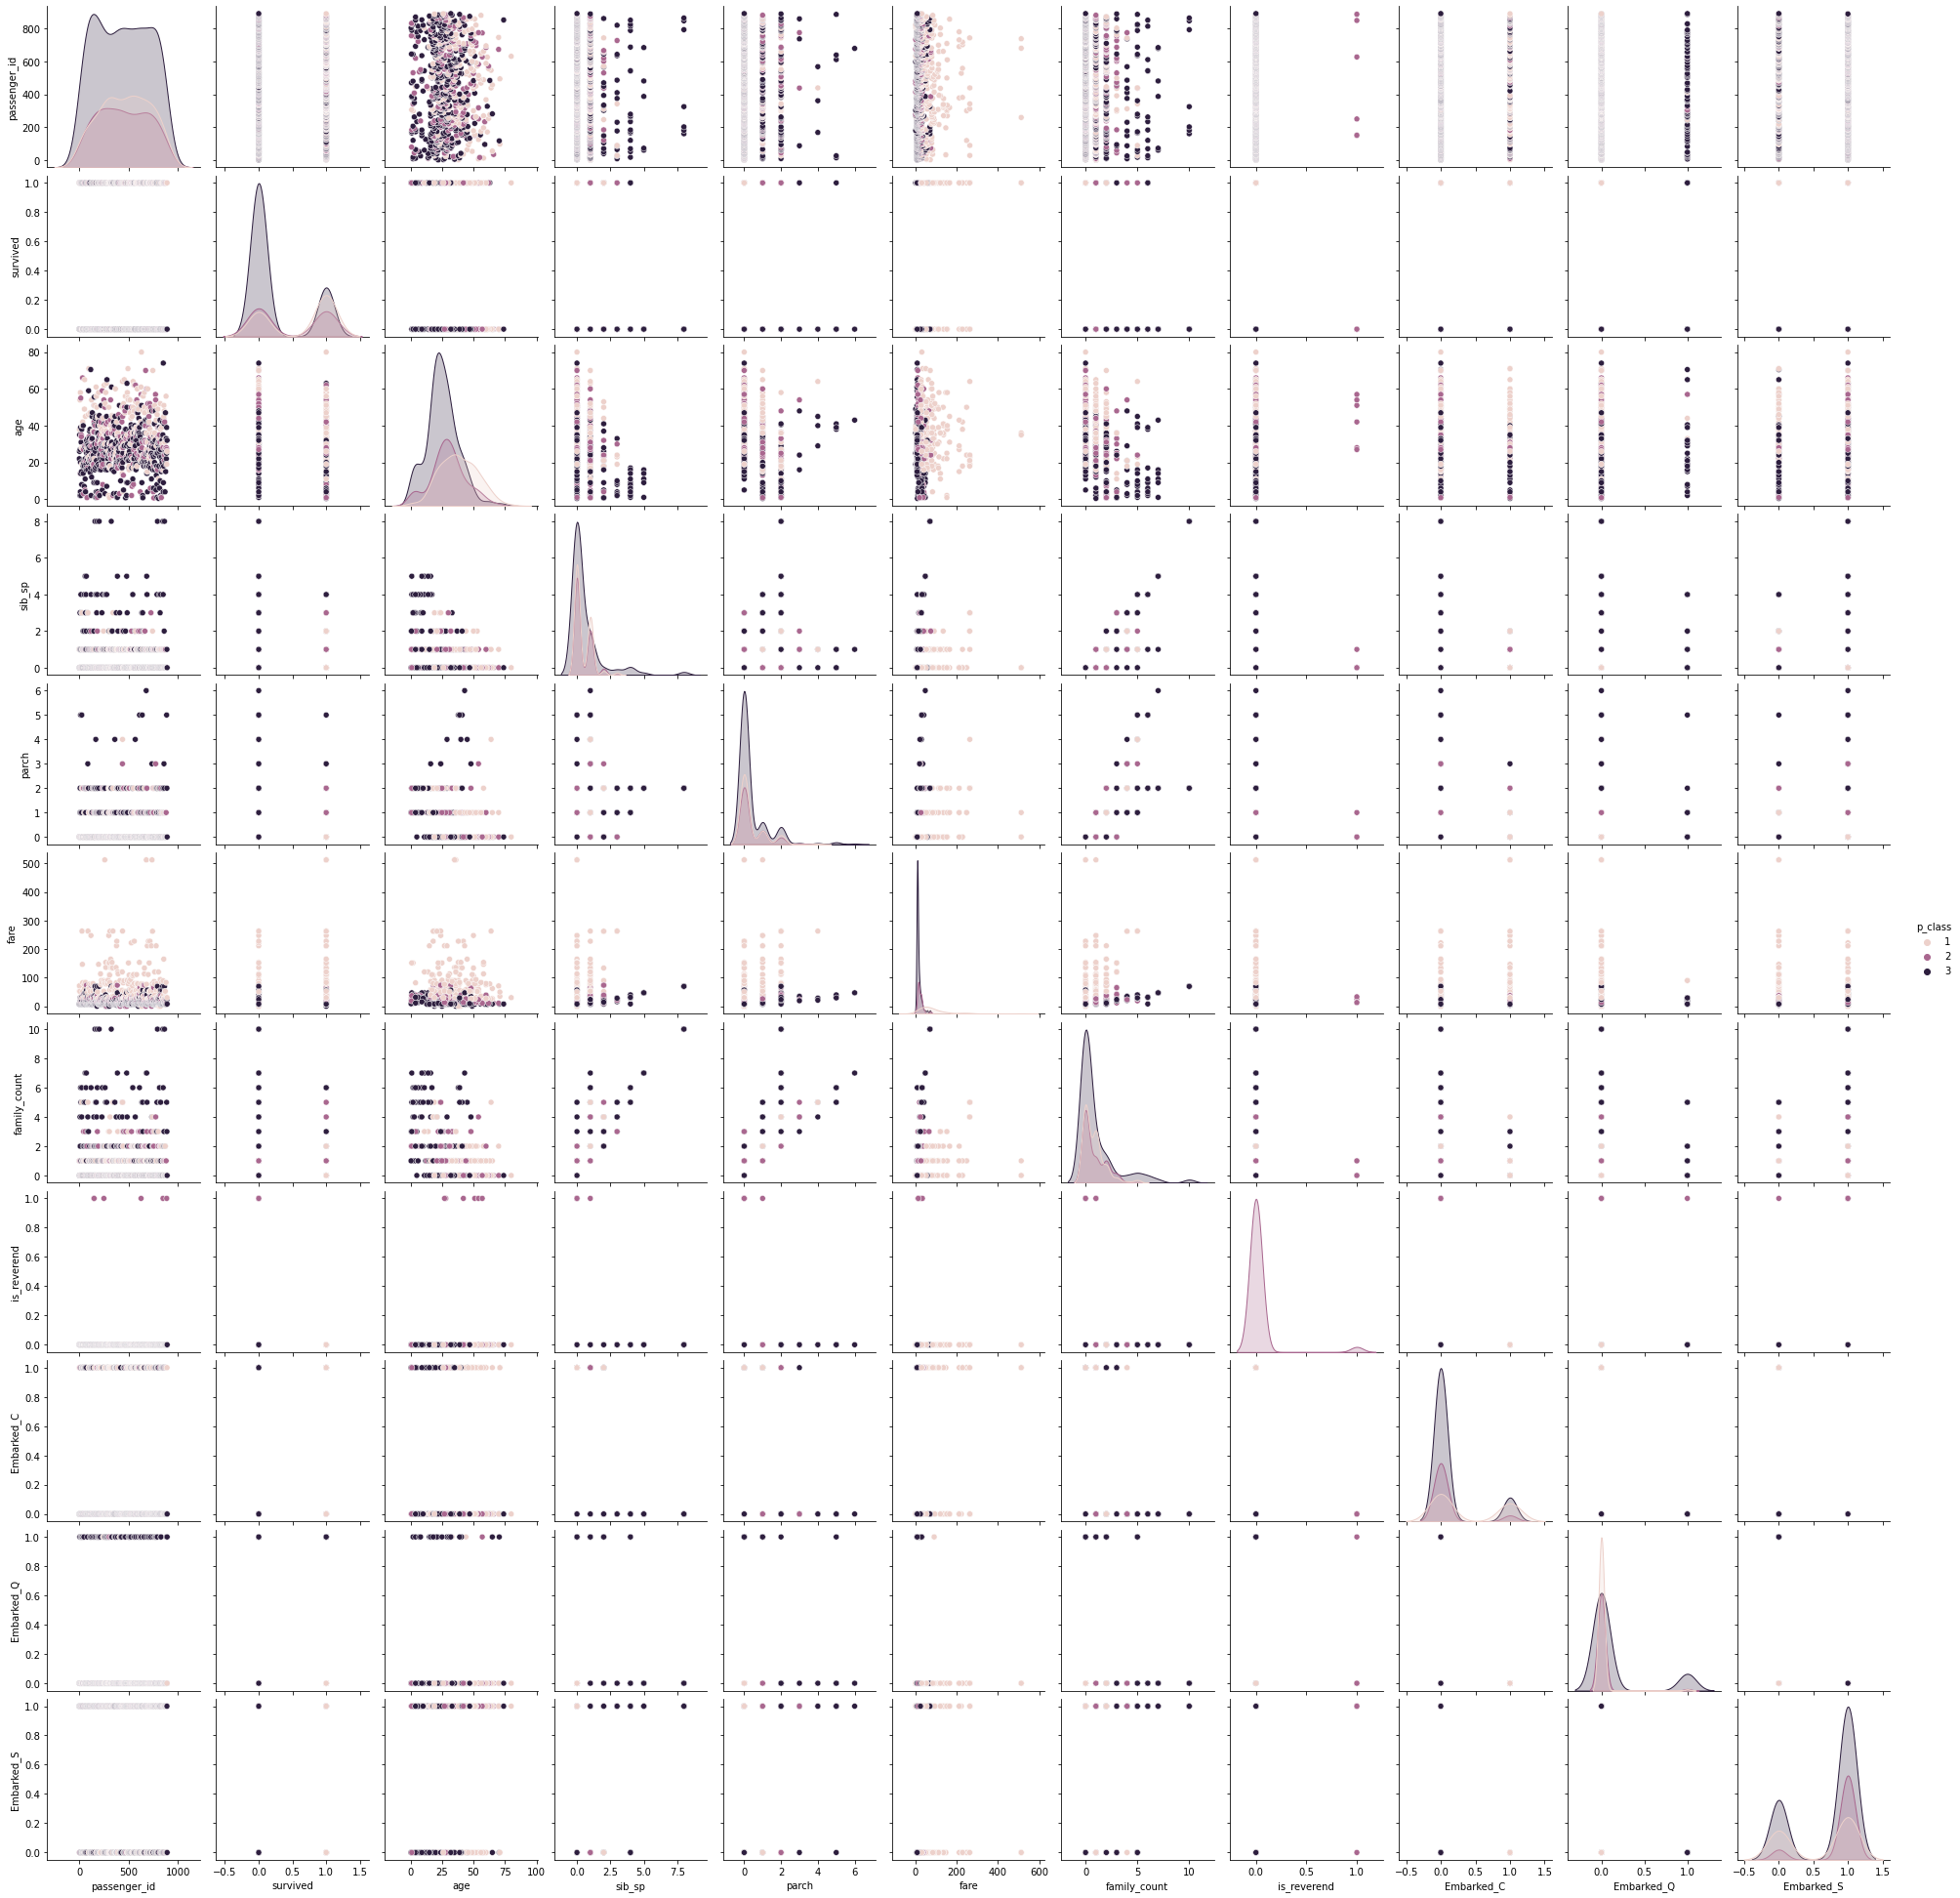

In [50]:
#generating a pairplot to get a general idea of relationships between columns
plt.figure(figsize=(9,9))
sns.pairplot(train, hue = 'p_class');

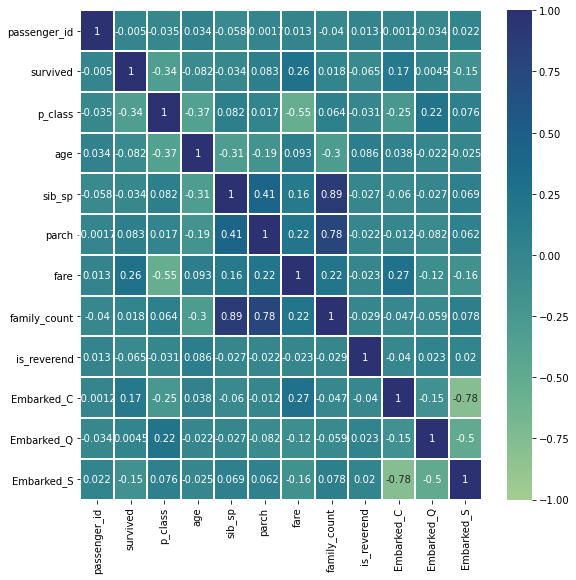

In [53]:
#generating a heatmap to get a general idea of relationships between columns
plt.figure(figsize=(9,9))
sns.heatmap(train.corr(), 
            vmin = -1,
            vmax = 1,
            linewidth = 1,
            annot = True,
            cmap = 'crest');

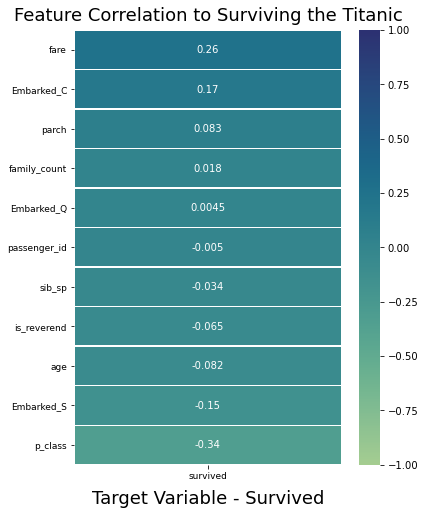

In [82]:
#from DSI0920 breakfast hour 10/06/21, reusable-graphing-functions:
def one_corr_heatmap(data, target_variable, title, x_label, size_var = 18, use_abs = False):
    # set size_var as a parameter with a default of 18
    plt.figure(figsize=(6, 8))
    # abstract title as parameter
    plt.title(title, fontsize = size_var, pad = size_var / 2)
    
    sns.heatmap(data.corr()[[target_variable]].sort_values(by=target_variable, 
                                                           ascending = False, 
                                                           key = np.abs if use_abs else None)[1:], 
                                                           vmin = -1, vmax = 1, linewidth = 0.5,
                                                           annot = True, cmap = 'crest')
    
    # abstract the "x" axis lavel as a parameter, x_label
    plt.xlabel(x_label, fontsize = size_var, labelpad = size_var/2)
    plt.xticks(fontsize=size_var/2)

    # abstract the "y" axis lavel as a parameter, y_label
    plt.yticks(fontsize=size_var/2);
    
one_corr_heatmap(data = train, 
                 target_variable = 'survived', 
                 x_label = 'Target Variable - Survived', 
                 title = 'Feature Correlation to Surviving the Titanic')

- The above heatmap shows there's not a particularly strong relationship between Survivorship and any other feature.
    - p_class and fare have the strongest relationships, which makes sense since they are closely related themselves

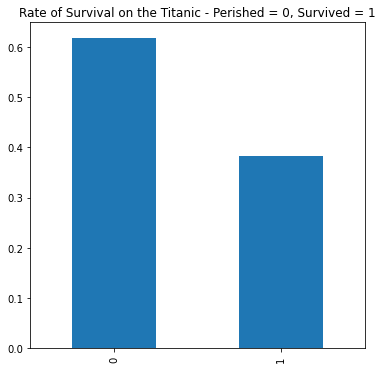

In [55]:
plt.figure(figsize=(6,6))
train.survived.value_counts(normalize=True).plot(kind = 'bar', title = 'Rate of Survival on the Titanic - Perished = 0, Survived = 1');

In [58]:
#as survived is a boolean value, we can get the percent survived by taking the mean.
survived_by_class = train.groupby('p_class')['survived'].mean()
survived_by_class

p_class
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64

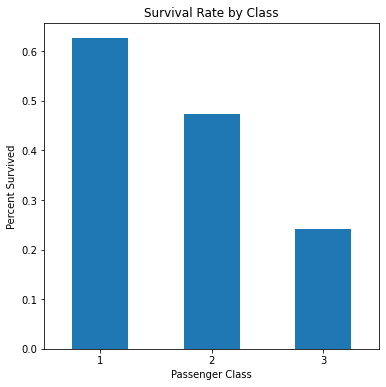

In [59]:
plt.figure(figsize=(6,6))
survived_by_class.plot.bar(rot = 0).set(title = 'Survival Rate by Class', xlabel = 'Passenger Class', ylabel = 'Percent Survived');

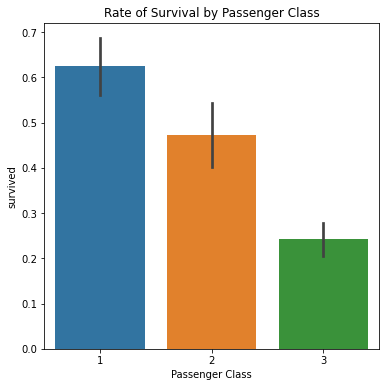

In [56]:
#a different way of producing the bar plot, with seaborn
plt.figure(figsize=(6,6))
sns.barplot(x = 'p_class', y = 'survived', data = train).set(title = 'Rate of Survival by Passenger Class', xlabel = 'Passenger Class');

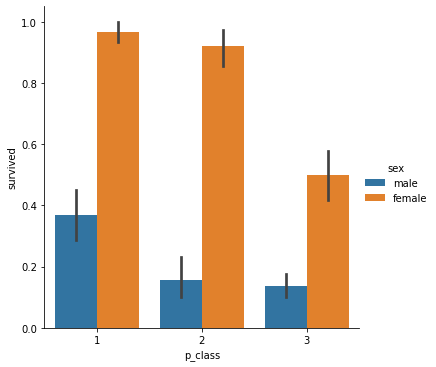

In [60]:
#https://seaborn.pydata.org/generated/seaborn.catplot.html
x = sns.catplot(
        x = 'p_class',
        y = 'survived',
        hue = 'sex',
        kind = 'bar',
        data = train,
    )

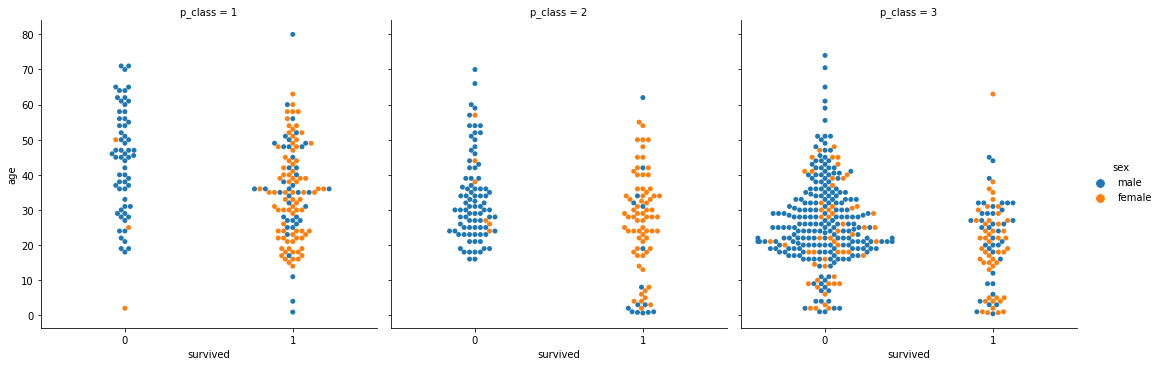

In [61]:
sns.catplot(
    x = 'survived',
    y = 'age',
    hue = 'sex',
    col = 'p_class',
    data = train,
    orient = 'v',
    kind = 'swarm',
    );
#note to self, catplot is great because if you try to orient your graphs incorrectly you get an error that your points can't be plotted!

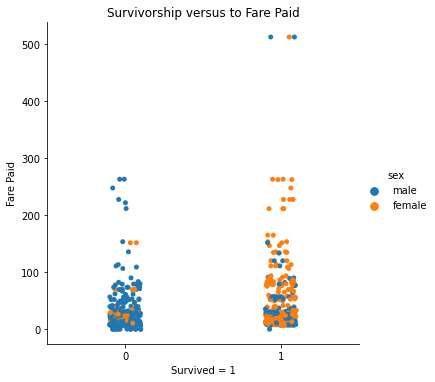

In [64]:
sns.catplot(
    x = 'survived',
    y = 'fare',
    hue = 'sex',
    data = train,
    orient = 'v',
    kind = 'strip',
    ).set(title = 'Survivorship versus to Fare Paid',
          xlabel = 'Survived = 1',
          ylabel = 'Fare Paid');

- As movie-goers may expect, some male passengers who paid alot for their tickets (*cough* Billy Zane's character *cough*) were able to survive, even considering males' overall low rate of survivorship. 

In [65]:
train[['sex']].value_counts(normalize = True, ascending = False)

sex   
male      0.649044
female    0.350956
dtype: float64

In [66]:
#this plots the overall rate of passengers by sex, for ease of reference

#plt.figure(figsize=(6,6))
#train[['sex']].value_counts(normalize = True, ascending = True).plot.bar(color = 'chartreuse').set(title = 'Passengers by Sex', xlabel = 'Sex', ylabel = 'Percent of Passengers');

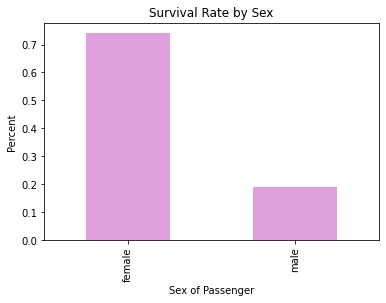

In [67]:
#as survived is a boolean value, we can get the percent survived by taking the mean.
surv_by_sex = train.groupby('sex')['survived'].mean()
surv_by_sex.plot.bar(color = 'plum').set(title = 'Survival Rate by Sex', xlabel = 'Sex of Passenger', ylabel = 'Percent');

- Is there a way I can plot these on top of each other? Stacked bar charts or a subplot maybe? Try to re-visit this in the future. 

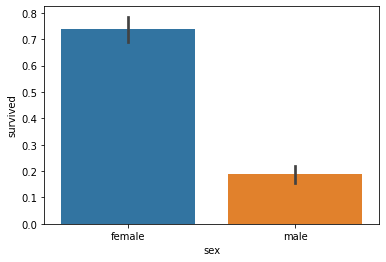

In [68]:
#a different way of producing the bar plot, with seaborn
sns.barplot(x = 'sex', y = 'survived', data = train, order = ('female', 'male'));

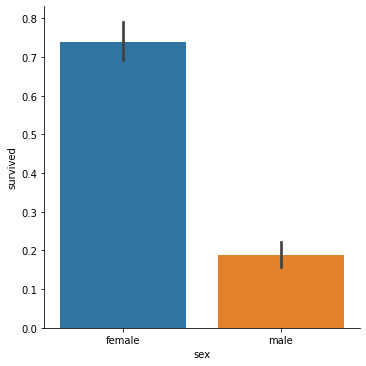

In [69]:
#different plot with seaborn but represents the same as above, just playing around with functionalty. 
x = sns.catplot(
        x = 'sex',
        y = 'survived',
        kind = 'bar',
        data = train,
        order = ('female', 'male')
    )

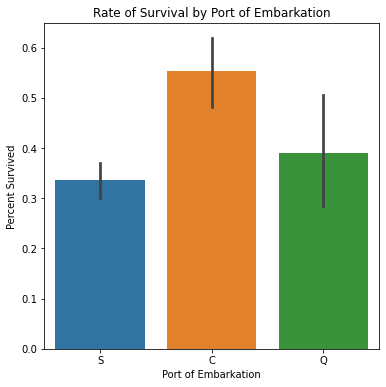

In [70]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'embarked', y = 'survived', data = train).set(title = 'Rate of Survival by Port of Embarkation',
                                                              xlabel = 'Port of Embarkation',
                                                              ylabel = 'Percent Survived');

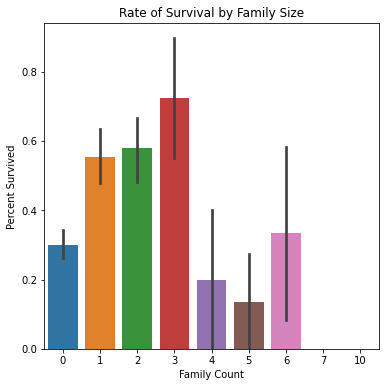

In [71]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'family_count', y = 'survived', data = train).set(title = 'Rate of Survival by Family Size',
                                                                  xlabel = 'Family Count',
                                                                  ylabel = 'Percent Survived');

- As I observed in the EDA section, families of count '3' had the highest rate of survival. I'd assume these were parents with single child or a single parent with multiple children. 

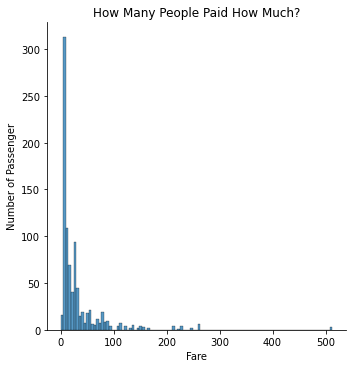

In [72]:
#Playing around with some plots I found in the course of doing this lab:

#Looking at the count for fare prices
#https://seaborn.pydata.org/generated/seaborn.displot.html
sns.displot(data = train, x = "fare").set(title = 'How Many People Paid How Much?', xlabel = 'Fare', ylabel = 'Number of Passenger');

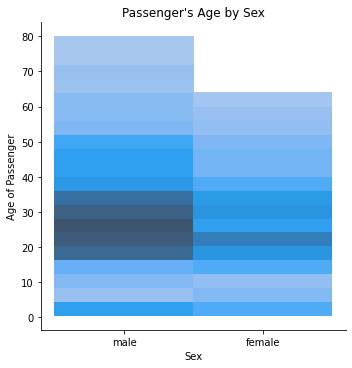

In [73]:
#looking at the breakdown of male and female passenger's ages
sns.displot(data = train, x = "sex", y = "age").set(title = 'Passenger\'s Age by Sex', xlabel = 'Sex', ylabel = 'Age of Passenger');

- 'Passenger's Age by Sex' shows that passengers (of both sex) around ages 20 - 23 were the most represented ages on board.

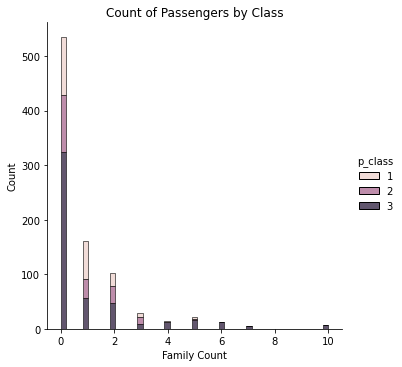

In [74]:
sns.displot(data = train, x="family_count", hue="p_class", multiple="stack").set(title = 'Count of Passengers by Class', xlabel = 'Family Count');

- 'Count of Passengers by Class' plot shows that most first class passengers were either traveling by themselves or with one other person. Very few families appeared to have travelled in first class with those of counts 3 and 5 being visible on the plot

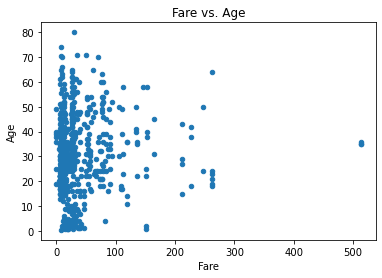

In [75]:
#trying out some scatter plots
train.plot.scatter(x = 'fare', y = 'age').set(title = 'Fare vs. Age', xlabel = 'Fare', ylabel = 'Age');

- This scatter plot shows the distribution of Fare vs. Age. From the plot we can note:
    1) This higest paid fare was above 500.00 units (pounds?), two passengers paid that fare.
    2) Higher priced tickets were few and far between: most people paid less than 100 units, many paid less than 50 units.

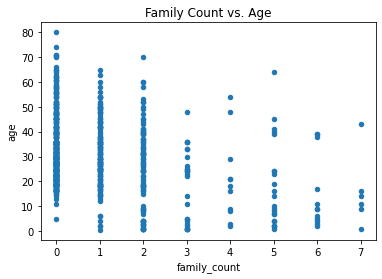

In [76]:
#scatter plot of family_count vs. age
train.plot.scatter(x = 'family_count', y = 'age').set(title = 'Family Count vs. Age');

#would these look better as a violin plot? Can I build that at this point?

- From the scatter plot there are a few things to note:
    1) There was one passenger around age five traveling by themselves. What?!
    2) The oldest passenger was traveling alone
    3) Families of count five have the widest range of ages

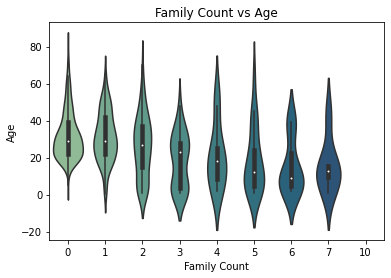

In [79]:
#https://seaborn.pydata.org/generated/seaborn.violinplot.html
ax = sns.violinplot(x = 'family_count',
                    y = 'age',
                    data = train,
                    palette = 'crest').set(title = 'Family Count vs Age',
                                           xlabel = 'Family Count',
                                           ylabel = 'Age')

- I suppose the one family_count value of '10' cannot generate a 'violin'

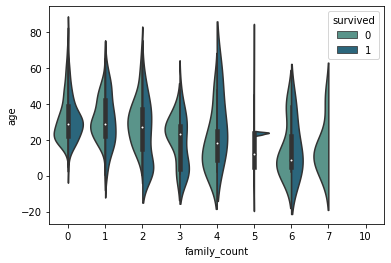

In [78]:
#https://seaborn.pydata.org/generated/seaborn.violinplot.html
sns.violinplot(x="family_count", y="age", hue = 'survived', data = train, split = True, palette="crest");

- As we noted from in our Exploratory Analysis above, no families with a count of 7 or more survived :(